### Read dataset

In [673]:
import pandas as pd

# this dataset is seperated by ';'
df = pd.read_csv('kaggle_dataset.csv', sep=';')
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [674]:
df.shape

(70000, 13)

In [675]:
df.sample(frac=0.2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
45177,64523,18703,1,155,65.0,120,80,1,1,0,0,1,1
25340,36171,23166,1,157,123.0,130,90,3,3,0,0,1,1
56421,80515,21325,2,175,76.0,110,70,1,1,0,0,1,0
41086,58714,21146,1,162,65.0,150,90,1,1,0,1,1,1
35269,50385,18146,1,152,65.0,120,60,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24535,35033,17278,2,170,85.0,110,90,1,1,0,0,1,0
16480,23546,21045,1,163,72.0,130,80,1,1,0,0,1,1
9465,13488,16589,1,166,69.0,90,60,1,1,0,0,1,0
2818,3972,17351,1,162,61.0,120,80,1,1,0,0,1,0


### Clean dataset

In [676]:
import numpy as np 
from matplotlib import pyplot as plt

In [677]:
# Check for any null values

df.isnull().all()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [678]:
# removed unique value column as it is not required for training 

df.drop(columns=['id'], inplace=True)

In [679]:
# Identified duplicates in the dataset

duplicated = df[df.duplicated(keep=False)]
duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1
1204,16793,1,165,68.0,120,80,1,1,0,0,1,0
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
1612,20293,1,162,70.0,110,70,1,1,0,0,1,0
2305,20495,1,165,70.0,120,80,1,1,0,0,1,0


In [680]:
# Removed duplicates and kept only the first instance of it

df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))

Total 69976 datapoints remaining with 12 features


In [681]:
# Renamed the attributes for better understanding and clarity
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular_disease'}, inplace =True)

In [682]:
df.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Remove outliers

In [683]:
filtered = df.copy()

In [684]:
# Removing outliers from the dataset for height and weight that fall below 2.5 and above 97.5 percentile of a given range.
filtered.drop(filtered[(filtered['height'] > filtered['height'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['height'] < filtered['height'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] > filtered['weight'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] < filtered['weight'].quantile(0.025))].index, inplace=True)
        

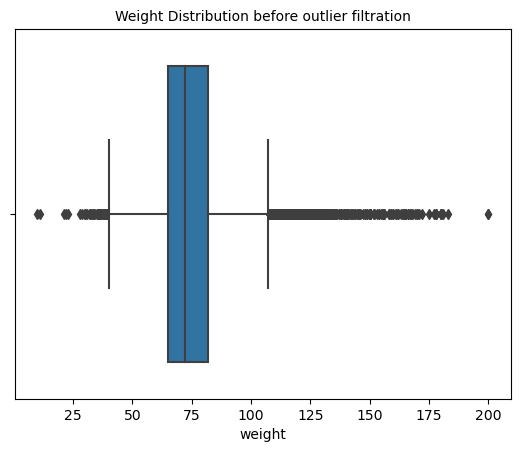

In [685]:
# Visualizing outliers using boxplot  

import seaborn as sns

weight_boxplot = sns.boxplot(x=df['weight'])
weight_boxplot.axes.set_title("Weight Distribution before outlier filtration", fontsize=10)
plt.show()

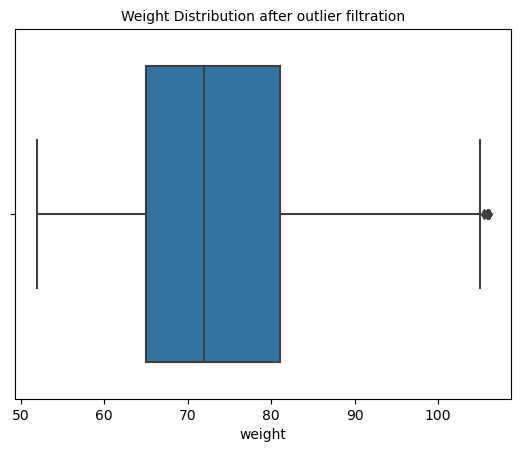

In [686]:
weight_boxplot = sns.boxplot(x=filtered['weight'])
weight_boxplot.axes.set_title("Weight Distribution after outlier filtration", fontsize=10)
plt.show()

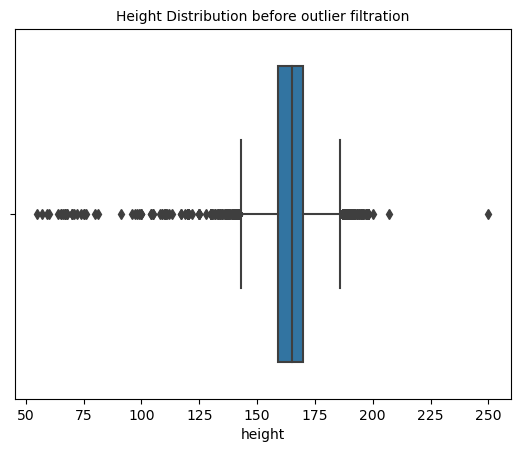

In [687]:
height_boxplot = sns.boxplot(x=df['height'])
height_boxplot.axes.set_title("Height Distribution before outlier filtration", fontsize=10)
plt.show()

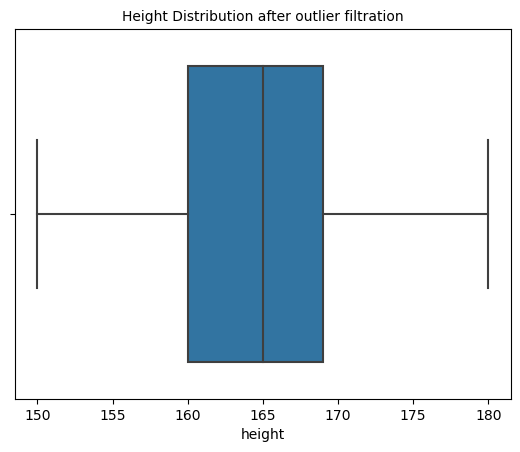

In [688]:
height_boxplot = sns.boxplot(x=filtered['height'])
height_boxplot.axes.set_title("Height Distribution after outlier filtration", fontsize=10)
plt.show()

In [689]:
# Checking whether diastolic blood pressure is greater than systolic blood pressure
# There are 1082 cases having diastolic blood pressure is greater than systolic blood pressure
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

1082

In [690]:
# Removing outliers from the dataset for diastolic and systolic that fall below 2.5 and above 97.5 percentile of a given range.
filtered.drop(filtered[(filtered['diastolic'] > filtered['diastolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['diastolic'] < filtered['diastolic'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] > filtered['systolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] < filtered['systolic'].quantile(0.025))].index, inplace=True)
        

In [691]:
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

0

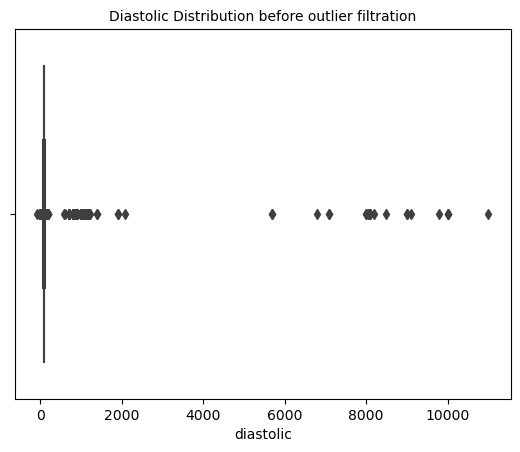

In [692]:
diastolic_boxplot = sns.boxplot(x=df['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution before outlier filtration", fontsize=10)
plt.show()

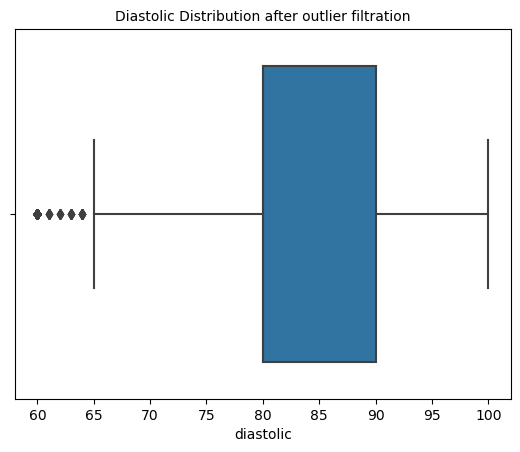

In [693]:
diastolic_boxplot = sns.boxplot(x=filtered['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution after outlier filtration", fontsize=10)
plt.show()

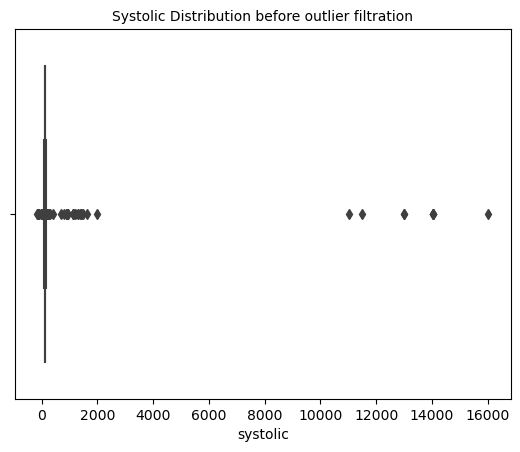

In [694]:
systolic_boxplot = sns.boxplot(x=df['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution before outlier filtration", fontsize=10)
plt.show()

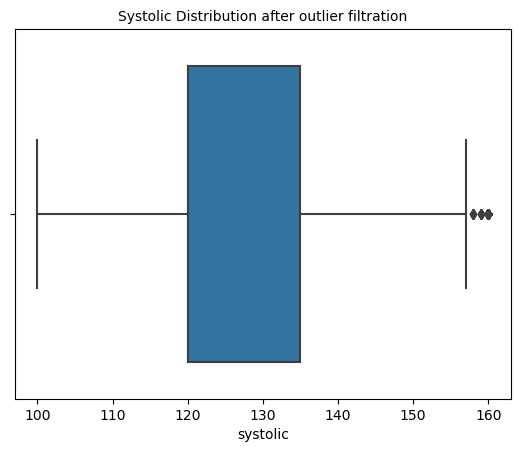

In [695]:
systolic_boxplot = sns.boxplot(x=filtered['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution after outlier filtration", fontsize=10)
plt.show()

In [696]:
filtered.describe()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease
count,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000
mean,19468.661958,1.347391,164.555234,73.428943,125.766920,81.045635,1.351051,1.220320,0.085629,0.051890,0.803653,0.488238
std,2460.663683,0.476145,6.831413,11.616070,13.757056,8.239341,0.670117,0.567727,0.279818,0.221807,0.397237,0.499866
min,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17677.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,180.000000,106.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [697]:
df = filtered.copy()

### Feature extraction

In [698]:
# Transformed the age into years 
df['age'] = df['age'] // 365

# Extracted bmi from height and weight 
df['bmi'] = round(df['weight'] / (df['height']/100)**2, 2)

df.head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38
6,60,1,157,93.0,130,80,3,1,0,0,1,0,37.73
7,61,2,178,95.0,130,90,3,3,0,0,1,1,29.98
8,48,1,158,71.0,110,70,1,1,0,0,1,0,28.44
9,54,1,164,68.0,110,60,1,1,0,0,0,0,25.28


In [699]:
df['bmi'].describe()

count    60108.000000
mean        27.171348
std          4.404850
min         16.050000
25%         23.880000
50%         26.260000
75%         29.750000
max         46.670000
Name: bmi, dtype: float64

In [700]:
# Extracted pulse_pressure from systolic and diastolic blood pressure
df['pulse_pressure'] = df['systolic'] - df['diastolic']
df.head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,30
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,50
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,60
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,40
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38,40
6,60,1,157,93.0,130,80,3,1,0,0,1,0,37.73,50
7,61,2,178,95.0,130,90,3,3,0,0,1,1,29.98,40
8,48,1,158,71.0,110,70,1,1,0,0,1,0,28.44,40
9,54,1,164,68.0,110,60,1,1,0,0,0,0,25.28,50


### Exploratory Data Analysis

In [701]:
# Post data cleaning 60,108 of 70,000 records are available
df.shape

(60108, 14)

In [702]:
# Counting the number and males and females
# male = 2, female = 1
df['gender'].value_counts()

1    39227
2    20881
Name: gender, dtype: int64

In [703]:
# Average bmi in males and females
df.groupby('gender')['bmi'].mean()

gender
1    27.618593
2    26.331156
Name: bmi, dtype: float64

In [704]:
df.age.describe()

count    60108.000000
mean        52.839772
std          6.748500
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

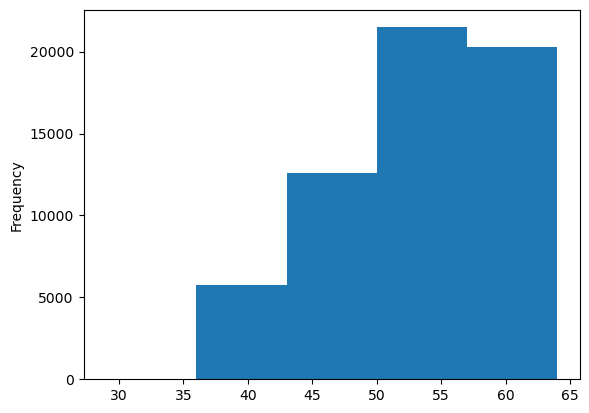

In [705]:
df.age.plot(kind='hist', bins=5)

In [706]:
df['cardiovascular_disease'].value_counts() 

0    30761
1    29347
Name: cardiovascular_disease, dtype: int64

In [707]:
# Total no of men in our target population without CVD
# male = 2, female = 1
df [(df['cardiovascular_disease'] == 0) & (df['gender'] == 2 )]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,30
11,51,2,173,60.0,120,80,1,1,0,0,1,0,20.05,40
12,40,2,165,60.0,120,80,1,1,0,0,0,0,22.04,40
19,59,2,162,56.0,120,70,1,1,1,0,1,0,21.34,50
20,54,2,163,83.0,120,80,1,1,0,0,1,0,31.24,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,55,2,177,80.0,130,80,1,1,0,0,1,0,25.54,50
69973,60,2,175,72.0,130,80,1,1,0,0,1,0,23.51,50
69980,48,2,167,69.0,110,80,1,1,0,1,0,0,24.74,30
69986,49,2,180,78.0,120,80,1,1,0,0,1,0,24.07,40


In [708]:
# Total no of women in our target population without CVD
# male = 2, female = 1
df [(df['cardiovascular_disease'] == 0) & (df['gender'] == 1 )]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular_disease,bmi,pulse_pressure
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,40
5,60,1,151,67.0,120,80,2,2,0,0,0,0,29.38,40
6,60,1,157,93.0,130,80,3,1,0,0,1,0,37.73,50
8,48,1,158,71.0,110,70,1,1,0,0,1,0,28.44,40
9,54,1,164,68.0,110,60,1,1,0,0,0,0,25.28,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69977,46,1,168,75.0,120,79,1,1,0,0,1,0,26.57,41
69983,53,1,165,72.0,120,80,1,1,0,0,1,0,26.45,40
69988,60,1,160,59.0,110,70,1,1,0,0,1,0,23.05,40
69991,56,1,159,72.0,130,90,2,2,0,0,1,0,28.48,40


In [709]:
df.shape

(60108, 14)

In [710]:
df.to_csv('preprocessed_dataset.csv', index=None)